# Vehicle License Plate Recognition 之 img2tfrecords

| 這是目錄 |
| ------ |
|    |


## 一、數據統計可視化

In [1]:
from pyecharts import Pie, Style
style = Style(
        width=900, height=700
)

chart = Pie("饼图示例", title_pos='center', **style.init_style)
chart.add("", 
          ['S', 'Y', 'X', 'U', 'V', 'B', 'R', 'F', 'H', 'P', 'T', 'Z', 'C', 'E', 'N', 'Q', 'K', 'A', 'G', 'J', 'L', 'D', 'M', 'W','5', '9', '8', '3', '1', '6', '7', '0', '4', '2','沪', '粤', '青', '赣', '京', '皖', '鄂', '鲁', '甘', '宁', '苏', '湘', '晋', '贵', '黑', '冀', '豫', '云', '琼', '辽', '浙', '桂', '川', '津', '渝', '蒙', '闽', '吉', '陕'], 
          [356, 689, 1810, 239, 239, 325, 223, 249, 536, 220, 324, 220, 319, 922, 240, 203, 219, 918, 228, 284, 255, 226, 283, 269,455, 472, 497, 438, 591, 423, 407, 534, 384, 478,114, 395, 24, 246, 105, 248, 212, 136, 35, 31, 167, 292, 59, 124, 51, 103, 216, 65, 44, 64, 264, 258, 260, 53, 95, 28, 186, 44, 55],
          radius=[40, 55], is_label_show=True)


chart.add("", ['字母', '数字', '汉字'], [9796, 4679, 3974], radius=[0, 30],
          legend_orient='vertical', legend_pos='left')
chart

<img src="img/Unknown-1.png">
<img src='img/Unknown.png'>

## 二、img2tfrecords

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf


def write_tfrecords(file_name, data_labels, data_datas):
    """
    創建tfrecords文件並寫入數據
    :param file_name: (string)文件名
    :param data_labels: (list)標籤
    :param data_datas: (list)數據
    :return: True
    """
    writer = tf.python_io.TFRecordWriter(file_name + ".tfrecords")
    num = len(data_labels)
    for i in range(num):
        if (i + 1) % 1000 == 0:
            print("以處理{0}數據集{1}張".format(file_name, i + 1))
        label = data_labels[i].encode()
        data = np.resize(data_datas[i], [1, 3456])[0].tostring()
        example = tf.train.Example(features=tf.train.Features(feature={
            "label": tf.train.Feature(bytes_list=tf.train.BytesList(value=[label])),
            'img_val': tf.train.Feature(bytes_list=tf.train.BytesList(value=[data]))
        }))  # example對象 對label及img_val 進行封裝
        writer.write(example.SerializeToString())
        i += 1
    print("{0}數據集處理完成".format(file_name))
    writer.close()
    return True


def get_data_list(path="车牌字符识别训练数据"):
    """
    遍歷目錄所有文件，將圖片格式化成24*48大小
    :param path: (string)遍歷路徑
    :return: (turp)圖片數據, 圖片標籤
    """
    fi = []
    rt = []
    for root, dirs, files in os.walk(path):
        for f in files:
            if f != '车牌字符识别训练数据' and f != '.DS_Store':
                # 路徑：os.path.join(root, f)
                im = cv2.resize(cv2.imread(os.path.join(root, f)), (24, 48), interpolation=cv2.INTER_CUBIC)
                fi.append(im)
                rt.append(root.split('/')[-1])
    return fi, rt


def make_data():
    """
    創建數據集，隨機打亂並存儲
    :return: None
    """
    from random import shuffle
    filedata, filelabel = get_data_list('车牌字符识别训练数据')
    x = [i for i in range(len(filelabel))]  # 共計18499文件
    shuffle(x)
    a = []
    b = []
    for i in x[:13000]: # 訓練集13000張圖片
        a.append(filelabel[i])
        b.append(filedata[i])
    write_tfrecords('train', a, b)
    a = []
    b = []
    for i in x[13000:16400]:    # 驗證集3400張圖片
        a.append(filelabel[i])
        b.append(filedata[i])
    write_tfrecords('validation', a, b)
    a = []
    b = []
    for i in x[16400:]: # 測試集2099張圖片
        a.append(filelabel[i])
        b.append(filedata[i])
    write_tfrecords('test', a, b)

    
make_data()

以處理train數據集1000張
以處理train數據集2000張
以處理train數據集3000張
以處理train數據集4000張
以處理train數據集5000張
以處理train數據集6000張
以處理train數據集7000張
以處理train數據集8000張
以處理train數據集9000張
以處理train數據集10000張
以處理train數據集11000張
以處理train數據集12000張
以處理train數據集13000張
train數據集處理完成
以處理validation數據集1000張
以處理validation數據集2000張
以處理validation數據集3000張
validation數據集處理完成
以處理test數據集1000張
以處理test數據集2000張
test數據集處理完成


## 三、tfrecords 讀取重現

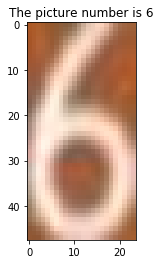

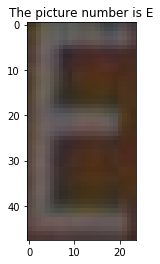

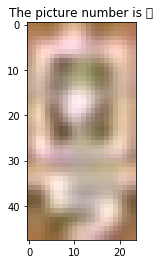

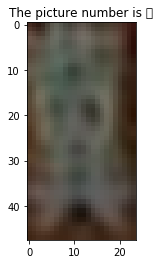

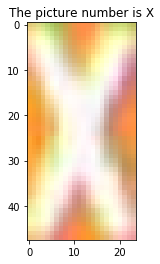

In [2]:
def print_tfrecord():
    # 將製作好的 tfrecord 數據集文件讀取出來,並轉換成圖片,以驗證數據是否準確無誤
    filename_queue = tf.train.string_input_producer(["train.tfrecords"])  # 讀入數據流
    reader = tf.TFRecordReader()
    _, serialized_example = reader.read(filename_queue)  # 返回文件名和文件
    features = tf.parse_single_example(serialized_example,
                                       features={
                                           'label': tf.FixedLenFeature([], tf.string),
                                           'img_val': tf.FixedLenFeature([], tf.string),
                                       })  # 取出包含image和label的feature对象
    image = tf.decode_raw(features['img_val'], tf.uint8)
    label = tf.cast(features['label'], tf.string)

    import matplotlib.pyplot as plt
    % matplotlib inline

    with tf.Session() as sess:  # 開始一個對話
        init_op = tf.global_variables_initializer()
        sess.run(init_op)
        coord = tf.train.Coordinator()
        threads = tf.train.start_queue_runners(coord=coord)
        for i in range(5):
            example, l = sess.run([image, label])  # 在會話中取出image和label數據
            img=np.resize(example, [48, 24, 3])
            plt.title("The picture number is " + str(l.decode('utf-8')))
#             plt.figure(figsize=(2,4))
            plt.imshow(img)
            plt.show()
        coord.request_stop()
        coord.join(threads)
        
print_tfrecord()